
## Implement Logistic Regression using Neural Network
## Aim: To classify the if the patient has breast cancer or not
# Dataset: Breast Cancer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [ ]:
data = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
X = data
y= pd.Series(cancer_data.target)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.25, random_state =42)

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape = (30,), activation = "relu"),
    tf.keras.layers.Dense(50, activation = "sigmoid"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(tf.expand_dims(X_train,axis =-1),y_train, validation_data = (X_val, y_val), epochs = 16)
loss, accuracy= model.evaluate(X_test, y_test)
print("\nLoss: ", round(loss,2), "Accuracy: ","%.2f"%accuracy)


Epoch 1/16
11/11 [==============================] - 1s 27ms/step - loss: 0.6988 - accuracy: 0.5015 - val_loss: 0.6294 - val_accuracy: 0.7368
Epoch 2/16
11/11 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.7243 - val_loss: 0.6114 - val_accuracy: 0.7368
Epoch 3/16
11/11 [==============================] - 0s 8ms/step - loss: 0.5908 - accuracy: 0.8270 - val_loss: 0.5898 - val_accuracy: 0.7632
Epoch 4/16
11/11 [==============================] - 0s 5ms/step - loss: 0.5758 - accuracy: 0.7771 - val_loss: 0.5718 - val_accuracy: 0.8246
Epoch 5/16
11/11 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.6804 - val_loss: 0.5698 - val_accuracy: 0.6140
Epoch 6/16
11/11 [==============================] - 0s 6ms/step - loss: 0.5505 - accuracy: 0.6334 - val_loss: 0.5644 - val_accuracy: 0.6140
Epoch 7/16
11/11 [==============================] - 0s 7ms/step - loss: 0.5447 - accuracy: 0.6334 - val_loss: 0.5603 - val_accuracy: 0.6140
Epoch 8/16
11/11 [=

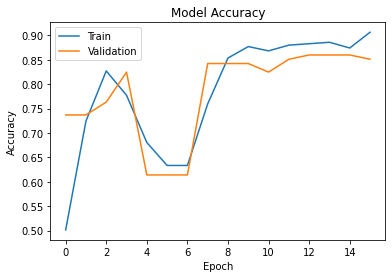

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

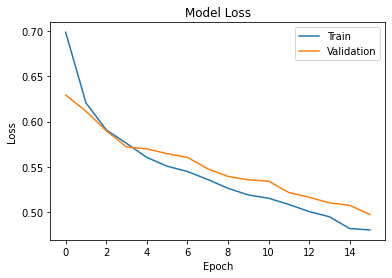

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [ ]:
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

4/4 [==============================] - 0s 7ms/step - loss: 0.4525 - accuracy: 0.9123
Test loss: 0.45254701375961304
Test accuracy: 0.9122806787490845


# Conclusion
* We have used the breast cancer dataset for building the logistic regression model. The model was twp dense layers woth 50 neurons in each and an output layer. The model was trained for 50 epochs,and it achieved an accuracy of 90%. The model is balanced, as there is no much difference between the  train and test errors.